# Sidekick - Histograms
We plot the histograms for the distribution of increase in money and time between jumps.

In [152]:
%matplotlib inline
import os
import sys
sys.path.insert(0, os.path.abspath('../utils/')) # Add sibling to Python path
sys.path.insert(0, os.path.abspath('../src/')) # Add sibling to Python path
sys.stdout.flush() # Print output on the fly in Notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['legend.fontsize'] = 16
from IPython.display import display
import numpy as np
import GPy
import cPickle as cp
import matplotlib.pyplot as plt
from math import floor
from dataset import Sidekick
from misc_utils import progress

DATA_DIR = "../data/sidekick"

def extract_jumps_and_times(project):
    jumps = np.diff(project.money)
    # -1 as first index to count the first jump (between 0 and the first pledge)
    times = np.diff([-1] + [i for i, j in enumerate(jumps) if j != 0])
    jumps = filter(lambda j: j != 0, jumps)
    return jumps, times

def show_histogram(y, x_label, y_label, x_scale='linear', y_scale='linear', bins=100):
    hist, bins = np.histogram(y, bins=bins)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.bar(center, hist, align='center', width=width)
    # Make counts of 1 visible in log scale
    ax.set_ylim(0.9, ax.get_ylim()[1] + 0.1 * ax.get_ylim()[1])
    ax.set_yscale(y_scale)
    ax.set_xscale(x_scale)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    plt.show()
    
def generate_jumps_times(iterable_collection_of_project):
    jumps = []
    times = []
    for project in iterable_collection_of_project:
        j, t = extract_jumps_and_times(project)
        jumps.extend(j)
        times.extend(t)
    return jumps, times

## Load data

In [2]:
sk = Sidekick()
sk.load()

Loading projects...
Loading statuses...
Converting to project instances...
Data loaded.


## Generate series of jumps and times

In [71]:
jumps, times = generate_jumps_times(sk)

## Histogram of jumps

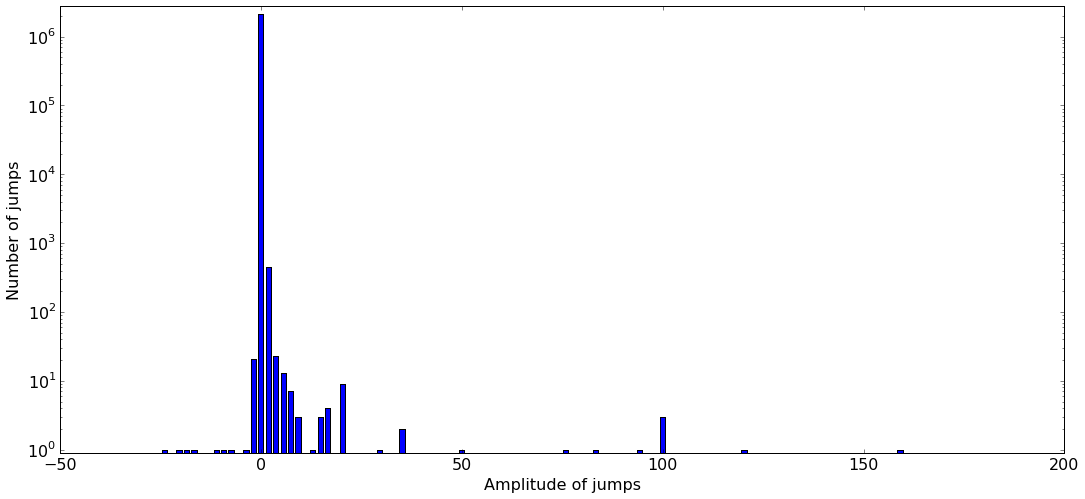

In [154]:
show_histogram(jumps, 
               x_label='Amplitude of jumps', 
               y_label='Number of jumps', 
               x_scale='linear', 
               y_scale='log', 
               bins=100)

## Histogram of times

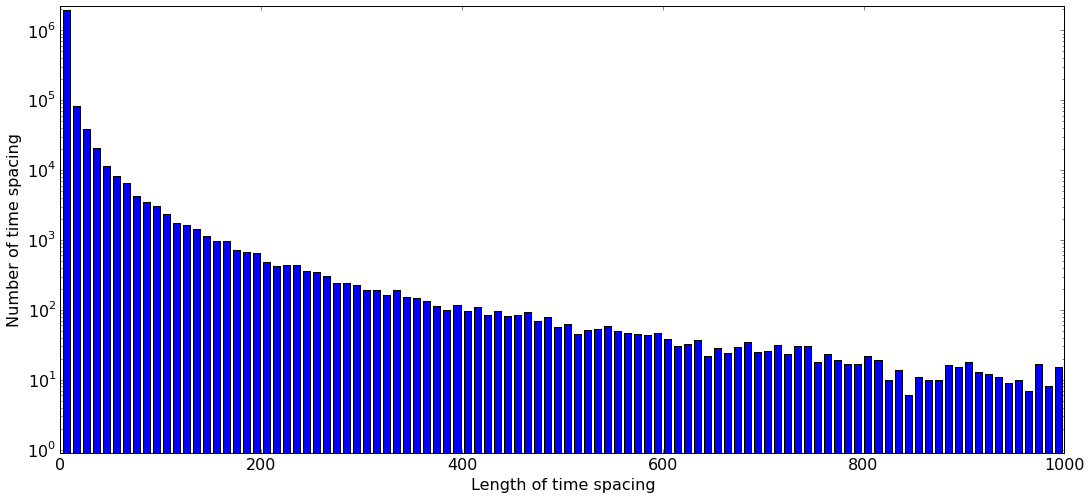

In [155]:
show_histogram(times, 
               x_label='Length of time spacing', 
               y_label='Number of time spacing', 
               x_scale='linear', 
               y_scale='log', 
               bins=100)

## Successful projects

In [41]:
successful = [project for project in sk if project.successful]
jumps_successful, times_successful = generate_jumps_times(successful)

### Histogram of jumps

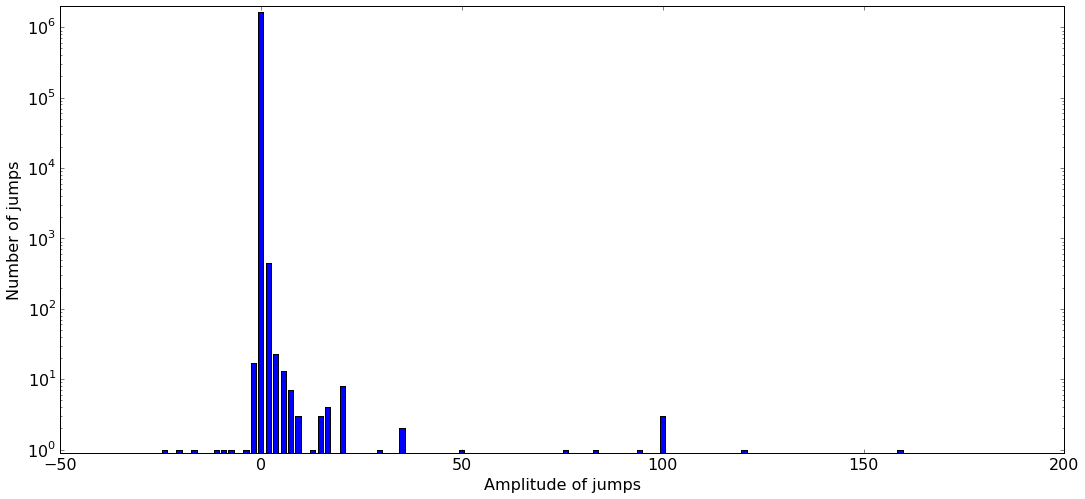

In [156]:
show_histogram(jumps_successful, 
               x_label='Amplitude of jumps', 
               y_label='Number of jumps', 
               x_scale='linear', 
               y_scale='log', 
               bins=100)

### Histogram of times

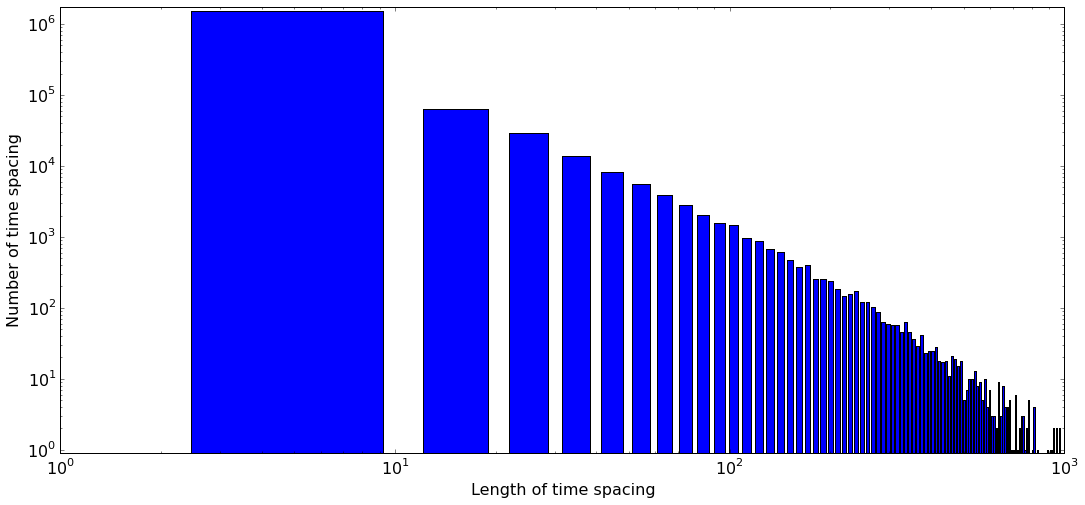

In [159]:
show_histogram(times_successful, 
               x_label='Length of time spacing', 
               y_label='Number of time spacing', 
               x_scale='log', 
               y_scale='log', 
               bins=100)

## Failed projects

In [74]:
failed = [project for project in sk if not project.successful]
jumps_failed, times_failed = generate_jumps_times(failed)

### Histogram of jumps

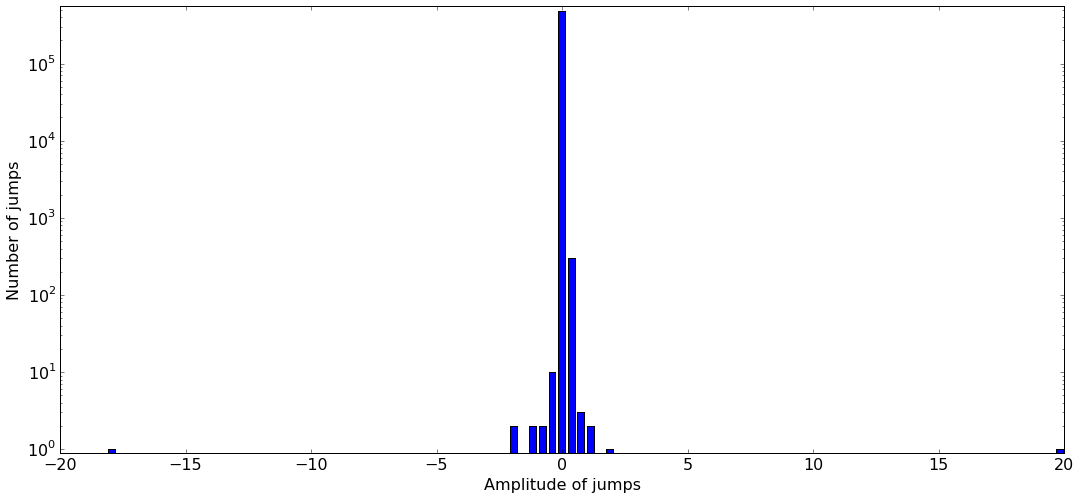

In [160]:
show_histogram(jumps_failed, 
               x_label='Amplitude of jumps', 
               y_label='Number of jumps', 
               x_scale='linear', 
               y_scale='log', 
               bins=100)

### Histogram of times

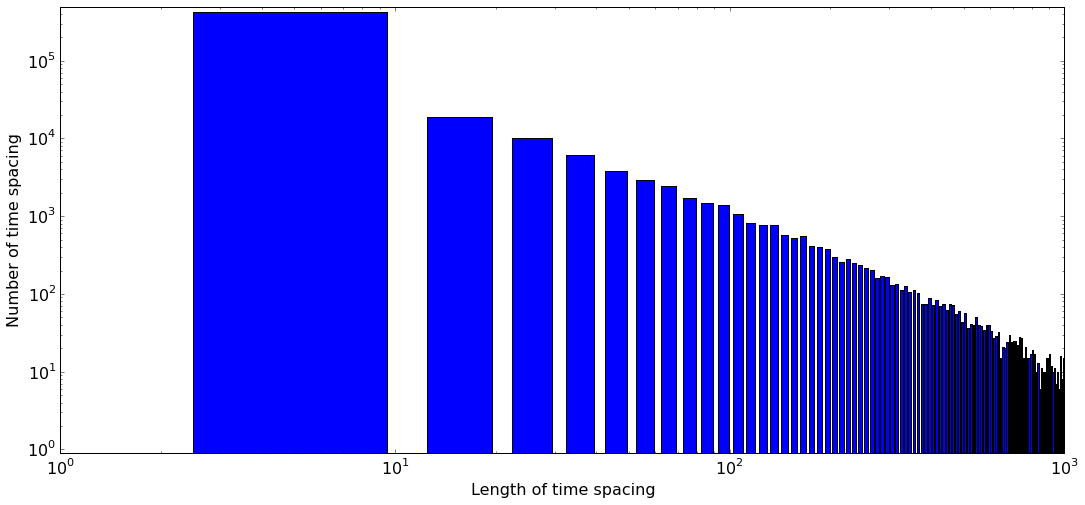

In [162]:
show_histogram(times_failed, 
               x_label='Length of time spacing', 
               y_label='Number of time spacing', 
               x_scale='log', 
               y_scale='log', 
               bins=100)

## Outliers

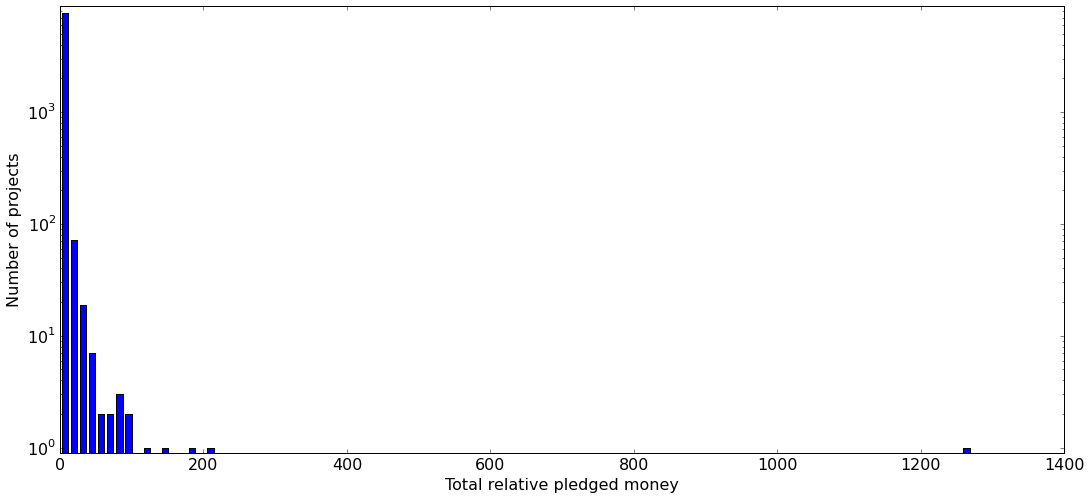

In [163]:
goal_successful = [project.money[-1] for project in sk if project.successful]
show_histogram(goal_successful,
              x_label='Total relative pledged money',
              y_label='Number of projects',
              x_scale='linear',
              y_scale='log',
              bins=100)